## Diabetes Study using Machine learning


In [1]:
# Importing the  libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
diabetes = pd.read_csv('C:/Users/LENOVO/diabetes.csv')
diabetes.shape

(768, 9)

In [3]:
diabetes.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
11            10      168             74              0        0  38.0   
12      

In [4]:
diabetes.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
11            10      168             74              0        0  38.0   
12    

In [5]:
diabetes.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
11            10      168             74              0        0  38.0   
12  

## Missing Value

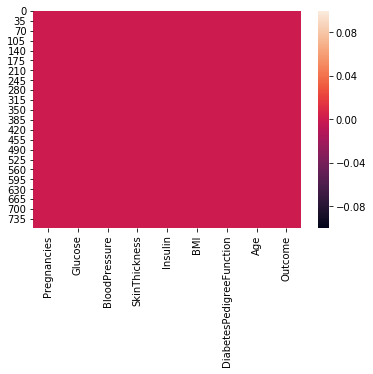

In [6]:
sb.heatmap(diabetes.isnull()) ## dataset or diabetes

In [7]:
x=diabetes.iloc[:, :-1].values
y=diabetes.iloc[:, 8].values

In [8]:
print(diabetes.groupby('Outcome').size())# to knw how many are diabetes

Outcome
0    500
1    268
dtype: int64


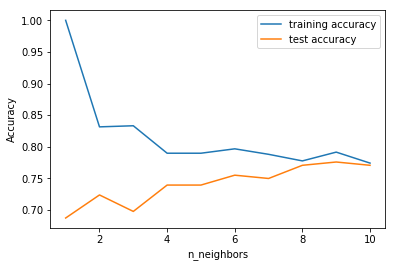

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'],
                                                 diabetes['Outcome'], stratify=diabetes['Outcome'],
                                                 random_state=66)
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    #build the model
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    #record training set accuracy
    training_accuracy.append(knn.score(X_train,y_train))
    #record test set accuaracy
    test_accuracy.append(knn.score(X_test,y_test))
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [18]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
print('Accuracy of k-NN classifier on training set:{:.2f}'.format(knn.score(X_train,y_train)))
print('Accuracy of k-NN classifier on test set:{:.2f}'.format(knn.score(X_test,y_test)))

Accuracy of k-NN classifier on training set:0.79
Accuracy of k-NN classifier on test set:0.78


In [21]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred=knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[105  20]
 [ 23  44]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       125
           1       0.69      0.66      0.67        67

   micro avg       0.78      0.78      0.78       192
   macro avg       0.75      0.75      0.75       192
weighted avg       0.77      0.78      0.77       192



In [ ]:
#Python
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
actual={1,1,0,1,0,0,1,0,0,0}
predicted={1,0,0,1,0,0,1,1,1,0}
results=confusion_matrix(actual,predicted)
print('Confusion Matrix :')
print(results)
print('Accuracy Score :',accuracy_score(actual, predicted))
print('Report:')
print(classificationPreport(actual))